In [1]:
import uproot
import awkward as ak
import numpy as np
import hist
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
from collections import defaultdict
import matplotlib.ticker as mtick
import cycler

In [63]:
p = "/grid_mnt/data__data.polcms/cms/cuisset/cmt/PreprocessRDF/bul_2018_ZZ_v12/qcd_ht500/cat_base_selection/prod_250315/data_{i}.root"
ar = uproot.concatenate([p.format(i=i) for i in range(17)], library="ak", filter_name=["isOS", "dau*_rawIdDeepTauVSjet", "isBoostedTau", "pairType"])

In [61]:
arf = ar[(ar.pairType == 2)&(ar.isBoostedTau)]
arf

<Array [{isBoostedTau: True, ...}, ..., {...}] type='319 * {isBoostedTau: b...'>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'QCD 700<HT<1000')

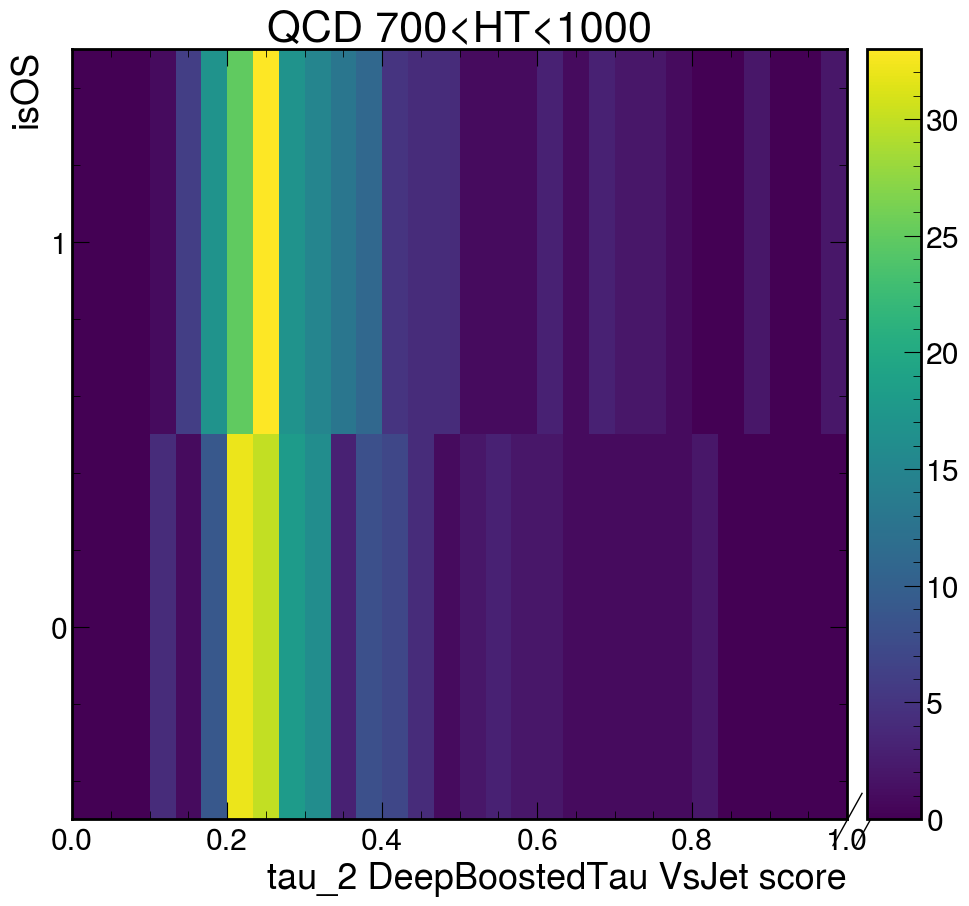

In [67]:
ax_deeptau = hist.axis.Regular(30, 0., 1.)
h = hist.Hist(ax_deeptau, hist.axis.IntCategory([0, 1])).fill(arf.dau2_rawIdDeepTauVSjet, arf.isOS)
# hs_norm = [h*(1/h.sum(flow=True)) for h in hs]
hep.hist2dplot(h)
plt.legend()
plt.xlabel("tau_2 DeepBoostedTau VsJet score")
plt.ylabel("isOS")
plt.title("QCD 700<HT<1000")

Text(1, 0, 'dau2_rawIdDeepTauVSjet')

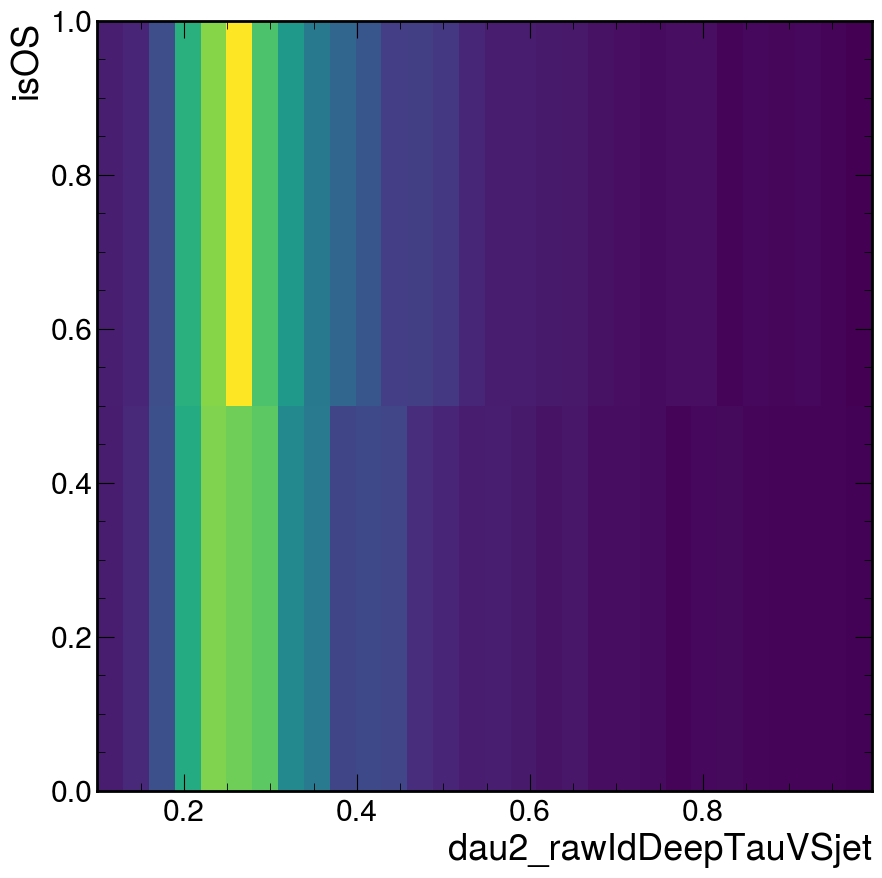

In [56]:
plt.hist2d(np.array(arf.dau2_rawIdDeepTauVSjet), np.array(arf.isOS), bins=(30, 2))
plt.ylabel("isOS")
plt.xlabel("dau2_rawIdDeepTauVSjet")

(array([ 262., 1132.,  642.,  272.,  157.,   82.,   45.,   39.,   22.,
          12.]),
 array([0.10107422, 0.19057617, 0.28007811, 0.36958009, 0.45908204,
        0.54858398, 0.63808596, 0.72758788, 0.81708986, 0.90659177,
        0.99609375]),
 <BarContainer object of 10 artists>)

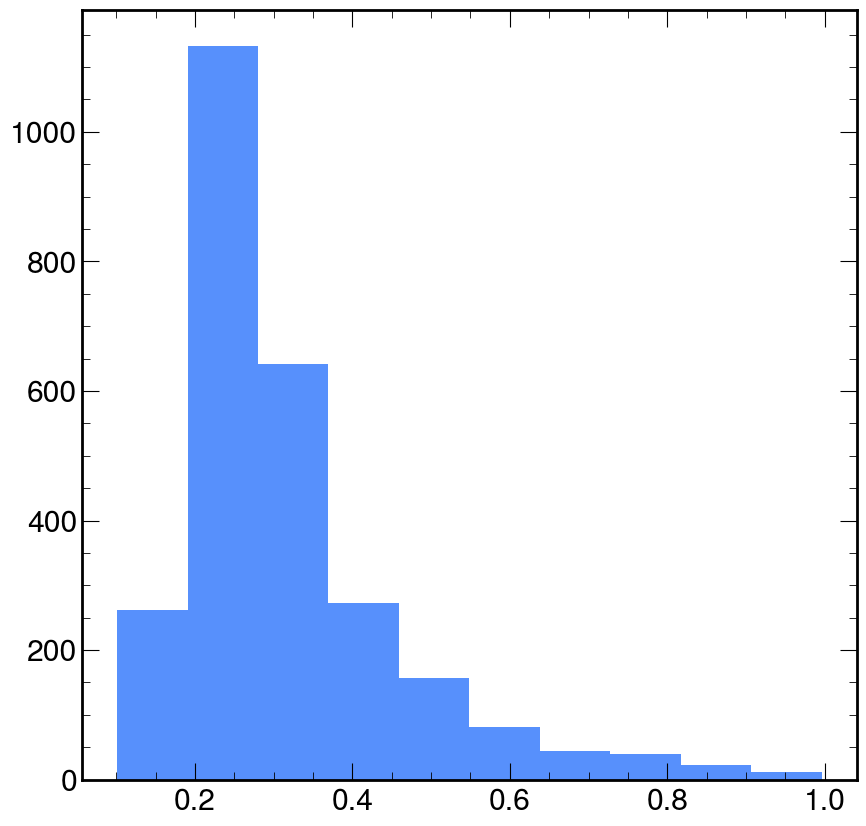

In [49]:
plt.hist(arf.dau2_rawIdDeepTauVSjet)

In [50]:
np.array(arf.dau2_rawIdDeepTauVSjet[arf.isOS])

array([0.28466797, 0.7807617 , 0.7807617 , ..., 0.7807617 , 0.28466797,
       0.7807617 ], dtype=float32)

Text(0.5, 1.0, 'QCD 700<HT<1000')

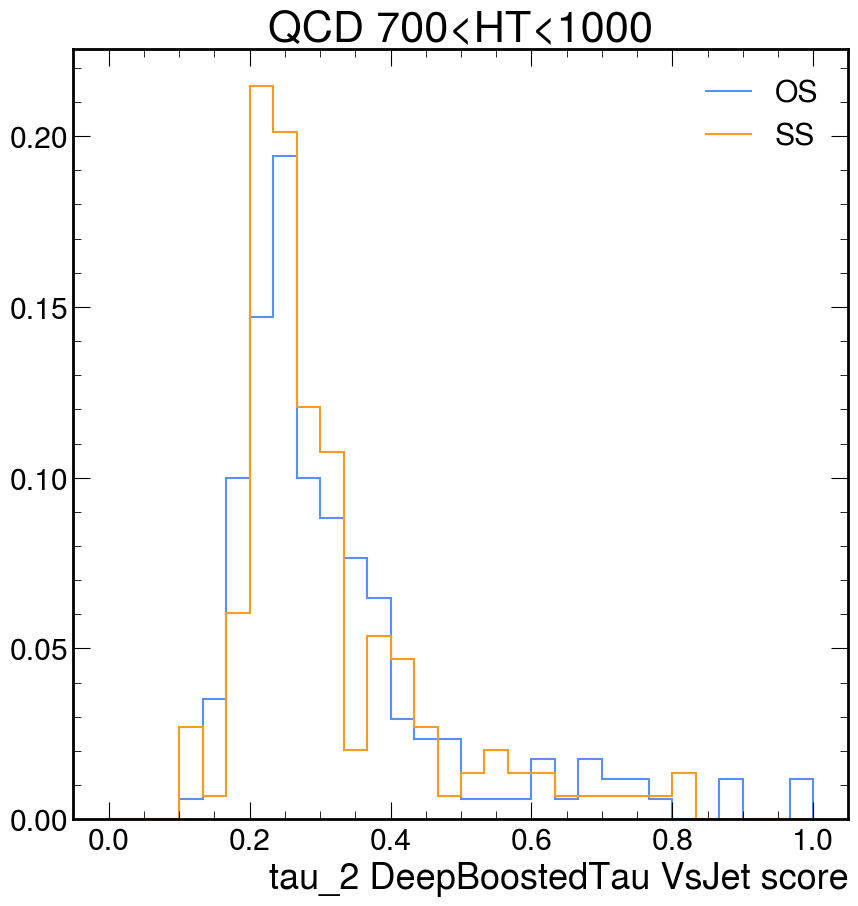

In [62]:
ax_deeptau = hist.axis.Regular(30, 0., 1.)
hs = [
    hist.Hist(ax_deeptau).fill(arf.dau2_rawIdDeepTauVSjet[ak.enforce_type(arf.isOS, "bool")]),
    hist.Hist(ax_deeptau).fill(arf.dau2_rawIdDeepTauVSjet[~ak.enforce_type(arf.isOS, "bool")]),
]
hs_norm = [h*(1/h.sum(flow=True)) for h in hs]
hep.histplot(hs_norm, label=["OS", "SS"], histtype="step", yerr=False)
plt.legend()
plt.xlabel("tau_2 DeepBoostedTau VsJet score")
plt.title("QCD 700<HT<1000")